<a href="https://colab.research.google.com/github/Bharrathi5/Web-scraping---JustWatch-in-python/blob/main/Assignment_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
movie_urls=[]

#scraping urls from respective class using href attribute
mov_urls = soup.find_all('a',class_="title-list-grid__item--link",href=True)

#Extract url separately and add link of website to movie url and append to the list
for mov_url in mov_urls:
        url =mov_url['href']
        link='https://www.justwatch.com'
        movie_urls.append(link+url)

print(movie_urls)
len(movie_urls)

['https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/salaar', 'https://www.justwatch.com/in/movie/tiger-3', 'https://www.justwatch.com/in/movie/nani30', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/sam-bahadur', 'https://www.justwatch.com/in/movie/parking-2023', 'https://www.justwatch.com/in/movie/mission-impossible-7', 'https://www.justwatch.com/in/movie/kaathal-the-core', 'https://www.justwatch.com/in/movie/killers-of-the-flower-moon', 'https://www.justwatch.com/in/movie/dunki', 'https://www.justwatch.com/in/movie/jawan', 'https://www.justwatch.com/in/movie/devil-2023', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/the-kerala-story', 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom', 'https://www.justwatch.com/in/movie/talk-to-me-2022', 'https://www.justwatch.com/in/movie/society-of-the-snow', 'https://www.just

100

## **Fetching Movie titles**

In [ ]:
# Write Your Code here

# Function to extract movie title from the URL
def extract_title(url):
    return url.split('/')[-1]

# Extract movie titles from the URLs
movie_titles = [extract_title(url) for url in movie_urls]

print(movie_titles)
print(len(movie_titles))

['12th-fail', 'animal-2022', 'salaar', 'tiger-3', 'nani30', 'oppenheimer', 'sam-bahadur', 'parking-2023', 'mission-impossible-7', 'kaathal-the-core', 'killers-of-the-flower-moon', 'dunki', 'jawan', 'devil-2023', 'hanu-man', 'the-kerala-story', 'aquaman-and-the-lost-kingdom', 'talk-to-me-2022', 'society-of-the-snow', 'barbie-2023', 'saltburn', 'guthlee-ladoo', 'kho-gaye-hum-kahan', 'lift-0', 'the-marvels', 'anatomie-dune-chute', 'poor-things', 'mangalavaram', 'sapta-sagaradaache-ello-side-b', 'past-lives', 'anyone-but-you', 'jigarthanda-doublex', 'three-of-us', 'annapoorani', 'napoleon-2023', 'leo-2023', 'the-family-plan', 'chittha', 'neru', 'rocky-aur-rani-ki-prem-kahani', 'harry-potter-and-the-philosophers-stone', 'ssmb-28', 'gadar-2', 'the-creator', 'the-holdovers', 'toby', 'tejas', 'zara-hatke-zara-bach-ke', 'interstellar', 'dada-2023', 'mad-max-fury-road', 'merry-christmas-2024', '365-days', 'fighter-2022', 'joe-2023', 'extra', 'role-play-2023', 'antony-2023', '777-charlie', 'godzi

## **Scrapping release Year**

In [ ]:
# Write Your Code here
release_years=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the release year
  year_element=soup.find('span', class_='text-muted')
  year=year_element.text.strip('( )')
  release_years.append(year)

print(release_years)
print(len(release_years))

['2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2001', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2014', '2023', '2015', '2024', '2020', '2024', '2023', '2023', '2023', '2023', '2022', '2023', '2013', '2023', '2010', '2023', '2023', '2018', '2023', '2022', '2019', '2023', '2023', '2023', '2005', '2023', '2021', '2023', '2023', '2023', '2023', '2023', '2022', '2017', '2023', '2008', '2023', '2022', '2019', '2023', '2023', '2024', '2018', '2021', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023']
100


## **Scrapping Genres**

In [ ]:
# Write Your Code here
genres=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the genre and extract genre
  genres_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')
  genre_element=genres_heading.find_next_sibling('div', class_='detail-infos__value')
  genre=genre_element.text
  genres.append(genre)

print(genres)
len(genres)

['Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Mystery & Thriller, Action & Adventure', 'Drama, Kids & Family, Romance', 'Drama, History', 'Drama, War & Military, History', 'Mystery & Thriller, Drama', 'Action & Adventure, Mystery & Thriller', 'Drama, Crime', 'Crime, History, Drama, Romance, Western', 'Comedy, Drama', 'Mystery & Thriller, Action & Adventure', 'Mystery & Thriller, Action & Adventure, Drama', 'Action & Adventure, Comedy, Science-Fiction, Fantasy', 'Drama', 'Action & Adventure, Fantasy, Science-Fiction', 'Horror, Mystery & Thriller', 'Drama, History, Mystery & Thriller', 'Comedy, Fantasy', 'Drama, Comedy, Mystery & Thriller', 'Drama', 'Drama, Comedy, Romance', 'Comedy, Crime, Drama, Mystery & Thriller, Action & Adventure', 'Science-Fiction, Action & Adventure, Fantasy', 'Drama, Mystery & Thriller, Crime', 'Romance, Comedy, Science-Fiction, Drama', 'Mystery & Thriller, Action & Adventure, Horror', 

100

## **Scrapping IMBD Rating**

In [ ]:
ratings=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  rating = soup.find_all(class_='jw-scoring-listing__rating')
  if len(rating)>3:
   temp=rating[1].text.strip().split()[0]
  else:
    temp='Nan'
  ratings.append(temp)
print(ratings)
len(ratings)

['9.2', '6.6', '6.6', '6.0', '8.3', '8.4', '8.1', '8.0', '7.7', '7.6', '7.7', '7.3', '7.0', '6.8', '8.6', '7.2', '5.8', '7.1', '7.9', '6.9', '7.1', '7.8', '7.7', '5.5', 'Nan', '7.8', '8.4', '6.7', '8.2', '7.9', '6.7', '8.1', '7.6', '3.6', '6.5', '7.2', '6.3', '8.3', '7.7', '6.6', '7.6', '6.4', '5.2', '6.8', 'Nan', '7.4', '5.3', '6.4', '8.7', '8.2', '8.1', '8.0', '3.3', '7.9', '7.7', '5.3', '5.4', '6.8', '8.8', '8.3', '8.2', '6.9', '8.8', '7.2', '6.9', '6.8', '6.5', '7.8', '8.4', 'Nan', '5.9', '5.8', '8.2', '7.4', '7.6', '6.7', '5.0', '6.2', '5.6', '8.1', '8.3', '7.8', '6.1', '9.0', '6.3', '7.8', '8.2', '7.3', '7.1', '7.3', '8.2', '8.0', '7.2', '6.2', '7.6', '6.7', '6.9', '6.7', '6.9', '8.6']


100

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtimes=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the timing and extract runtime
  time_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
  time_element=time_heading.find_next_sibling('div', class_='detail-infos__value')
  time=time_element.text
  runtimes.append(time)

print(runtimes)
len(runtimes)

['2h 26min', '3h 21min', '2h 55min', '2h 35min', '2h 35min', '3h 1min', '2h 30min', '2h 7min', '2h 44min', '1h 52min', '3h 26min', '2h 40min', '2h 49min', '2h 24min', '2h 39min', '2h 18min', '2h 4min', '1h 35min', '2h 25min', '1h 54min', '2h 11min', '1h 45min', '2h 15min', '1h 46min', '1h 45min', '2h 32min', '2h 21min', '2h 25min', '2h 28min', '1h 46min', '1h 43min', '2h 52min', '1h 39min', '2h 26min', '2h 38min', '2h 43min', '1h 59min', '2h 20min', '2h 30min', '2h 48min', '2h 32min', '2h 39min', '2h 48min', '2h 14min', '2h 13min', '2h 33min', '1h 52min', '2h 20min', '2h 49min', '2h 15min', '2h 0min', '2h 24min', '1h 54min', '2h 44min', '2h 27min', '2h 35min', '1h 41min', '2h 27min', '2h 46min', '2h 5min', '3h 0min', '1h 59min', '2h 28min', '1h 57min', '1h 45min', '2h 23min', '2h 21min', '2h 56min', '2h 2min', '1h 35min', '2h 26min', '2h 22min', '2h 20min', '1h 59min', '2h 55min', '1h 33min', '1h 56min', '2h 4min', '2h 13min', '2h 0min', '2h 46min', '1h 47min', '2h 20min', '2h 32min', 

100

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
age_ratings=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the age rating and extract
  age_heading = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
  if age_heading:
     age_element=age_heading.find_next_sibling('div',class_='detail-infos__value').text.strip()
  else:
     age_element='Nan'
  age_ratings.append(age_element)
print(age_ratings)
print(len(age_ratings))

['Nan', 'A', 'A', 'Nan', 'U', 'UA', 'UA', 'UA', 'Nan', 'UA', 'A', 'Nan', 'UA', 'Nan', 'UA', 'A', 'Nan', 'Nan', 'Nan', 'UA', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'UA', 'UA', 'Nan', 'UA', 'Nan', 'UA', 'Nan', 'UA', 'A', 'UA', 'UA', 'Nan', 'U', 'UA', 'UA', 'Nan', 'Nan', 'Nan', 'Nan', 'UA', 'Nan', 'U', 'A', 'UA', 'Nan', 'UA', 'Nan', 'Nan', 'Nan', 'Nan', 'UA', 'Nan', 'A', 'A', 'UA', 'U', 'Nan', 'UA', 'Nan', 'UA', 'A', 'Nan', 'Nan', 'UA', 'Nan', 'UA', 'UA', 'Nan', 'A', 'UA', 'Nan', 'U', 'UA', 'UA', 'Nan', 'Nan', 'Nan', 'UA', 'UA', 'Nan', 'UA', 'UA', 'A', 'UA', 'UA', 'U', 'UA', 'UA', 'Nan', 'UA', 'U', 'UA']
100


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
production_country=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the country and extract production country
  country=soup.find_all('div',class_='detail-infos')
  for con in country:
    c=con.find('h3',class_='detail-infos__subheading',string=' Production country ')
    if c:
     temp=con.find('div',class_='detail-infos__value')
  production_country.append(temp.text)
print(production_country)
print(len(production_country))

['India', 'United States, India', 'India', 'India', 'India', 'United States, United Kingdom', 'India', 'India', 'United States', 'India', 'United States', 'India', 'India', 'India', 'India', 'India', 'United States', 'Australia, United Kingdom', 'Spain, United States', 'United Kingdom, United States', 'United Kingdom, United States', 'India', 'India', 'United States', 'United States', 'France', 'Ireland, United Kingdom, United States', 'India', 'India', 'United States, South Korea', 'United States, Australia', 'India', 'India', 'India', 'United States', 'India', 'United States', 'India', 'India', 'India', 'United States, United Kingdom', 'India', 'India', 'United States, Canada', 'United States', 'India', 'India', 'India', 'United Kingdom, United States', 'India', 'United States, Australia', 'India', 'Poland', 'India', 'India', 'India', 'France, Germany, United States', 'India', 'India', 'Japan', 'United States', 'India', 'United Kingdom, United States', 'United Kingdom, United States'

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
streaming=[]

#Scraping year from every movie url
for movie_url in movie_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(movie_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the streaming service provider and extract
  streamservice=soup.find_all('div',class_='buybox-row stream')
  if streamservice:
    streams=streamservice[0].find_all('picture',class_='picture-wrapper')
    s_list=[]
    for stream in streams:
     service=stream.find_all('img',class_='offer__icon')
     for s in service:
      temp=s.get('alt')
      s_list.append(temp)
    result=','.join(s_list)
  else:
    result='Nan'
  streaming.append(result)

print(streaming)
print(len(streaming))

['Hotstar', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Nan', 'Zee5', 'Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV Plus', 'Nan', 'Netflix', 'Amazon Prime Video', 'Nan', 'Nan', 'Nan', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Nan', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Nan', 'Nan', 'Nan', 'Hotstar', 'Amazon Prime Video', 'Lionsgate Play', 'Nan', 'Netflix,Sun Nxt', 'Netflix', 'Nan', 'Nan', 'Netflix', 'Apple TV Plus', 'Hotstar', 'Nan', 'Amazon Prime Video', 'Jio Cinema', 'Nan', 'Zee5', 'Hotstar', 'Nan', 'Sony Liv', 'Nan', 'Nan', 'Amazon Prime Video,Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video,Jio Cinema', 'Nan', 'Netflix', 'Nan', 'Nan', 'Nan', 'Amazon Prime Video', 'Amazon Prime Video', 'Voot,Jio Cinema', 'Nan', 'Lionsgate Play', 'Netflix', 'Netflix,Amazon Prime Video,Jio Cinema', 'Nan', 'Netflix', 'Netflix,Amazon Prime Video,Jio Cinema', 'Netflix', 'Netflix', 'Amazon Prime Video,Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Jio Cine

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
moviedata_dict = {
    'Url':movie_urls,
    'Title':movie_titles,
    'Release_Year':release_years ,
    'Genres':genres ,
    'IMDb_Ratings':ratings,
    'Runtime':runtimes,
    'Age_rating':age_ratings,
    'Production_country':production_country,
    'Streaming_Service':streaming
}

movie_data=pd.DataFrame(moviedata_dict)

# Replace 'NaN' strings with actual NaN values
movie_data.replace('Nan', np.nan, inplace=True)

# Convert 'Imdb Ratings' column to numeric (float)
movie_data['IMDb_Ratings'] = pd.to_numeric(movie_data['IMDb_Ratings'])

display(movie_data)


,Url,Title,Release_Year,Genres,IMDb_Ratings,Runtime,Age_rating,Production_country,Streaming_Service
0,https://www.justwatch.com/in/movie/12th-fail,12th-fail,2023,Drama,9.2,2h 26min,NaN,India,Hotstar
1,https://www.justwatch.com/in/movie/animal-2022,animal-2022,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.6,3h 21min,A,"United States, India",Netflix
2,https://www.justwatch.com/in/movie/salaar,salaar,2023,"Crime, Drama, Mystery & Thriller, Action & Adv...",6.6,2h 55min,A,India,Netflix
3,https://www.justwatch.com/in/movie/tiger-3,tiger-3,2023,"Mystery & Thriller, Action & Adventure",6.0,2h 35min,NaN,India,Amazon Prime Video
4,https://www.justwatch.com/in/movie/nani30,nani30,2023,"Drama, Kids & Family, Romance",8.3,2h 35min,U,India,Netflix
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/yaariyan-2,yaariyan-2,2023,"Drama, Comedy, Romance",6.7,2h 28min,UA,India,NaN
96,https://www.justwatch.com/in/movie/may-december,may-december,2023,"Drama, Comedy",6.9,1h 57min,NaN,United States,NaN
97,https://www.justwatch.com/in/movie/odavum-mudi...,odavum-mudiyadhu-oliyavum-mudiyadhu,2024,"Comedy, Horror",6.7,2h 0min,UA,India,Amazon Prime Video
98,https://www.justwatch.com/in/movie/a-ranjith-c...,a-ranjith-cinema,2023,Mystery & Thriller,6.9,2h 29min,U,India,Netflix


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
tvshow_urls=[]

#scraping urls from respective class using href attribute
tv_urls = soup.find_all('a',class_="title-list-grid__item--link",href=True)

#Extract url separately and add link of website to movie url and append to the list
for tv_url in tv_urls:
        url =tv_url['href']
        link='https://www.justwatch.com'
        tvshow_urls.append(link+url)

print(tvshow_urls)
len(tvshow_urls)

['https://www.justwatch.com/in/tv-show/jack-reacher', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/berlin', 'https://www.justwatch.com/in/tv-show/true-detective', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/indian-police-force', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman', 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen', 'https://www.justwatch.com/in/tv-show/the-freelancer', 'https://www.justwatch.com/in/tv-show/killer-soup', 'https://www.justwatch.com/in/tv-show/the-last-of-us', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/fool-me-once', 'https://www.justwatch.com/in/tv-show/what-if-2021', 'https://www.justwatch.com/in/tv-show/maharani-2021', 'https://www.justwatch.com/in/tv-show/monarch-legacy-of-monsters', 'https://www.justw

100

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
# Function to extract movie title from the URL
def extract_title(url):
    return url.split('/')[-1]

# Extract movie titles from the URLs
tvshow_titles = [extract_title(url) for url in tvshow_urls]

print(tvshow_titles)
print(len(tvshow_titles))

['jack-reacher', 'mirzapur', 'berlin', 'true-detective', 'game-of-thrones', 'indian-police-force', 'solo-leveling-2024', 'bigg-boss', 'the-legend-of-hanuman', 'jujutsu-kaisen', 'the-freelancer', 'killer-soup', 'the-last-of-us', 'farzi', 'fool-me-once', 'what-if-2021', 'maharani-2021', 'monarch-legacy-of-monsters', 'yellowstone', 'death-and-other-details', 'my-demon', 'paperhouse', 'panchayat', 'the-bear', 'fargo', 'deaths-game', 'flames', 'marry-my-husband', 'aashram', 'succession', 'the-railway-men-the-untold-story-of-bhopal-1984', 'gandii-baat', 'asur', 'taaza-khabar', 'loki', 'the-family-man', 'mastram', 'the-real-story-of', 'the-brothers-sun', 'koffee-with-karan', 'breaking-bad', 'gullak', 'aspirants', 'superman-and-lois', 'echo', 'scam-1992', 'scam-2003-the-telgi-story', 'percy-jackson-and-the-olympians', 'lucifer', 'under-the-dome', 'euphoria', 'peaky-blinders', 'perilloor-premier-league', 'menaka', 'dark-desire', 'dehati-ladke', 'gyeongseong-creature', 'house-of-the-dragon', 'ho

## **Fetching Release Year**

In [ ]:
# Write Your Code here
release_years=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the release year
  year_element=soup.find('span', class_='text-muted')
  year=year_element.text.strip('( )')
  release_years.append(year)

print(release_years)
print(len(release_years))

['2022', '2018', '2023', '2014', '2011', '2024', '2024', '2006', '2021', '2020', '2023', '2024', '2023', '2023', '2024', '2021', '2021', '2023', '2018', '2024', '2023', '2017', '2020', '2022', '2014', '2023', '2018', '2024', '2020', '2018', '2023', '2018', '2020', '2023', '2021', '2019', '2020', '2016', '2024', '2004', '2008', '2019', '2021', '2021', '2024', '2020', '2023', '2023', '2016', '2013', '2019', '2013', '2024', '2019', '2020', '2023', '2023', '2022', '2004', '2024', '2021', '2023', '2010', '2009', '2023', '2020', '2024', '2024', '2007', '2024', '2019', '2020', '2022', '2018', '2019', '2016', '2005', '2023', '2024', '2011', '2024', '2020', '2010', '2018', '2019', '2024', '2009', '2023', '2007', '2021', '2013', '2018', '2024', '2010', '2022', '2018', '2011', '2023', '2023', '2023']
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
genres=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the genre and extract genre
  genres_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')
  genre_element=genres_heading.find_next_sibling('div', class_='detail-infos__value')
  genre=genre_element.text
  genres.append(genre)

print(genres)
len(genres)

['Drama, Mystery & Thriller, Action & Adventure, Crime', 'Crime, Action & Adventure, Mystery & Thriller, Drama', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Crime, Mystery & Thriller', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Action & Adventure, Crime', 'Animation, Action & Adventure, Fantasy, Science-Fiction', 'Reality TV, Kids & Family', 'Animation, Action & Adventure, Fantasy', 'Action & Adventure, Fantasy, Mystery & Thriller, Animation, Science-Fiction', 'Action & Adventure, Mystery & Thriller, Drama', 'Mystery & Thriller, Comedy, Drama', 'Drama, Action & Adventure, Horror, Science-Fiction, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller', 'Mystery & Thriller, Crime, Drama', 'Science-Fiction, Animation, Action & Adventure', 'Drama', 'Drama, Science-Fiction, Action & Adventure', 'Drama, Western', 'Mystery & Thriller, Drama, Crime', 'Science-Fiction, Romance, Comedy, Drama, Fantasy', 'Action & Adventure, Crime, Drama, Mystery & Thriller, Made

100

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
ratings=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')
  rating = soup.find_all(class_='jw-scoring-listing__rating')
  if len(rating)>3:
   temp=rating[1].text.strip().split()[0]
  else:
    temp='Nan'
  ratings.append(temp)
print(ratings)
len(ratings)

['8.1', '8.5', '7.0', '8.9', '9.2', '5.4', '8.5', '3.7', '9.2', '8.6', '8.1', '6.3', '8.8', '8.4', '6.8', '7.5', '7.9', '7.0', '8.7', '7.0', '7.8', '8.2', '8.9', '8.6', '8.9', '8.7', '8.9', '8.2', '7.4', '8.9', '8.5', '3.4', '8.5', '8.1', '8.2', '8.7', '7.2', '8.5', '7.7', '6.4', '9.5', '9.1', '9.2', '7.8', '6.1', '9.3', '7.9', '7.4', '8.1', '6.5', '8.3', '8.8', '7.5', '7.9', '6.5', '7.2', '7.4', '8.4', '8.7', '5.5', '7.2', '8.0', '8.5', '7.2', '8.4', '7.9', 'Nan', '8.0', '8.7', '7.6', '8.7', '8.6', '8.1', '8.0', '8.2', '8.7', '8.3', '7.8', '6.3', '8.5', '8.2', 'Nan', '8.4', '8.3', '8.3', '7.2', '8.5', '7.1', '8.2', '7.8', '9.0', '8.3', '6.0', '8.1', '8.1', '7.7', '8.4', '8.0', '7.5', '8.8']


100

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
age_ratings=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the age rating and extract
  age_heading = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
  if age_heading:
     age_element=age_heading.find_next_sibling('div',class_='detail-infos__value').text.strip()
  else:
     age_element='Nan'
  age_ratings.append(age_element)
print(age_ratings)
print(len(age_ratings))

['A', 'Nan', 'Nan', 'U', 'U', 'A', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'A', 'Nan', 'Nan', 'Nan', 'UA', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'A', 'Nan', 'A', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'A', 'U', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'A', 'A', 'U', 'Nan', 'Nan', 'Nan', 'Nan', 'A', 'UA', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'U', 'Nan', 'A', 'Nan', 'Nan', 'Nan', 'Nan', 'Nan', 'U', 'A', 'Nan', 'U', 'A', 'Nan', 'Nan', 'A', 'A', 'A', 'Nan', 'Nan', 'U', 'Nan', 'UA', 'Nan', 'Nan', 'A', 'A', 'A', 'Nan', 'A', 'Nan', 'A']
100


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
production_country=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the country and extract production country
  country=soup.find_all('div',class_='detail-infos')
  for con in country:
    c=con.find('h3',class_='detail-infos__subheading',string=' Production country ')
    if c:
     temp=con.find('div',class_='detail-infos__value')
  production_country.append(temp.text)
print(production_country)
print(len(production_country))

['United States', 'India', 'Spain', 'United States', 'United States', 'India', 'Japan, South Korea', 'India', 'India', 'Japan', 'India', 'India', 'United States', 'India', 'United Kingdom, United States', 'United States', 'India', 'United States', 'United States', 'United States', 'South Korea', 'Spain', 'India', 'United States', 'United States', 'South Korea', 'India', 'South Korea', 'India', 'United States', 'India', 'India', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United Kingdom', 'India', 'India', 'Mexico', 'India', 'South Korea', 'United States', 'United States', 'Poland', 'South Korea', 'India', 'United States', 'India', 'United States', 'India', 'Japan', 'United States', 'Japan', 'United States', 'United States', 'India', 'United States', 'United States', 'India', 'Unit

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
streaming=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the streaming service provider and extract
  streamservice=soup.find_all('div',class_='buybox-row stream')
  if streamservice:
    streams=streamservice[0].find_all('picture',class_='picture-wrapper')
    s_list=[]
    for stream in streams:
     service=stream.find_all('img',class_='offer__icon')
     for s in service:
      temp=s.get('alt')
      s_list.append(temp)
      result=','.join(s_list)
  else:
      result='Nan'
  streaming.append(result)

print(streaming)
print(len(streaming))

['Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Jio Cinema', 'Jio Cinema', 'Amazon Prime Video', 'Crunchyroll', 'Voot,Tata Play', 'Hotstar', 'Netflix,Crunchyroll', 'Hotstar', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Hotstar', 'Sony Liv,VI movies and tv', 'Apple TV Plus', 'Netflix', 'Hotstar', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'Nan', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'MX Player', 'Jio Cinema', 'Netflix', 'Alt Balaji', 'Jio Cinema,Voot', 'Hotstar', 'Hotstar', 'Amazon Prime Video', 'Nan', 'Amazon Prime Video,ManoramaMax', 'Netflix', 'Hotstar', 'Netflix', 'Sony Liv', 'Amazon Prime Video,Amazon miniTV', 'Amazon Prime Video', 'Nan', 'Sony Liv', 'Sony Liv', 'Nan', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Hotstar', 'Amazon Prime Video,ManoramaMax', 'Netflix', 'Amazon miniTV', 'Netflix', 'Jio Cinema', 'Amazon Prime Video,Jio Cinema', 'Netflix', 'Netflix', 'Netflix', 'Lionsgate Play', 'Hotstar', 'Ne

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
runtimes=[]

#Scraping year from every movie url
for tvshow_url in tvshow_urls:
  # Sending an HTTP GET request to the URL
  page=requests.get(tvshow_url)

  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  soup=BeautifulSoup(page.text,'html.parser')

  # Find the element containing the timing and extract runtime
  time_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
  time_element=time_heading.find_next_sibling('div', class_='detail-infos__value')
  time=time_element.text
  runtimes.append(time)

print(runtimes)
len(runtimes)


['48min', '36min', '48min', '1h 2min', '58min', '38min', '23min', '1h 15min', '21min', '23min', '50min', '51min', '58min', '56min', '48min', '32min', '44min', '46min', '50min', '46min', '1h 6min', '50min', '33min', '34min', '52min', '51min', '31min', '1h 1min', '43min', '1h 4min', '59min', '44min', '47min', '29min', '49min', '45min', '28min', '41min', '55min', '46min', '47min', '29min', '44min', '43min', '41min', '52min', '44min', '39min', '47min', '43min', '58min', '58min', '37min', '32min', '34min', '24min', '1h 9min', '1h 2min', '44min', '43min', '1h 12min', '1h 2min', '54min', '20min', '56min', '45min', '24min', '41min', '23min', '55min', '1h 1min', '30min', '49min', '43min', '31min', '1h 1min', '24min', '43min', '44min', '54min', '51min', '34min', '58min', '31min', '54min', '45min', '21min', '53min', '20min', '58min', '25min', '24min', '1h 14min', '46min', '45min', '48min', '44min', '35min', '23min', '47min']


100

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tvshowdata_dict = {
    'Url':tvshow_urls,
    'Title':tvshow_titles,
    'Release_Year':release_years ,
    'Genres':genres ,
    'IMDb_Ratings':ratings,
    'Runtime':runtimes,
    'Age_rating':age_ratings,
    'Production_country':production_country,
    'Streaming_Service':streaming
}

tvshow_data=pd.DataFrame(tvshowdata_dict)

# Replace 'NaN' strings with actual NaN values
tvshow_data.replace('Nan', np.nan, inplace=True)

# Convert 'Imdb Ratings' column to numeric (float)
tvshow_data['IMDb_Ratings'] = pd.to_numeric(tvshow_data['IMDb_Ratings'])

display(tvshow_data)


,Url,Title,Release_Year,Genres,IMDb_Ratings,Runtime,Age_rating,Production_country,Streaming_Service
0,https://www.justwatch.com/in/tv-show/jack-reacher,jack-reacher,2022,"Drama, Mystery & Thriller, Action & Adventure,...",8.1,48min,A,United States,Amazon Prime Video
1,https://www.justwatch.com/in/tv-show/mirzapur,mirzapur,2018,"Crime, Action & Adventure, Mystery & Thriller,...",8.5,36min,NaN,India,Amazon Prime Video
2,https://www.justwatch.com/in/tv-show/berlin,berlin,2023,"Drama, Action & Adventure, Crime, Mystery & Th...",7.0,48min,NaN,Spain,Netflix
3,https://www.justwatch.com/in/tv-show/true-dete...,true-detective,2014,"Drama, Crime, Mystery & Thriller",8.9,1h 2min,U,United States,Jio Cinema
4,https://www.justwatch.com/in/tv-show/game-of-t...,game-of-thrones,2011,"Drama, Action & Adventure, Science-Fiction, Fa...",9.2,58min,U,United States,Jio Cinema
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/you,you,2018,"Drama, Romance, Mystery & Thriller, Crime",7.7,48min,A,United States,Netflix
96,https://www.justwatch.com/in/tv-show/suits,suits,2011,"Comedy, Drama",8.4,44min,NaN,United States,"Netflix,Amazon Prime Video,Jio Cinema"
97,https://www.justwatch.com/in/tv-show/beef,beef,2023,"Comedy, Drama",8.0,35min,A,United States,Netflix
98,https://www.justwatch.com/in/tv-show/mashle-ma...,mashle-magic-and-muscles,2023,"Animation, Action & Adventure, Comedy, Fantasy...",7.5,23min,NaN,Japan,Crunchyroll


## **Task 2 :- Data Filtering & Analysis**

 Movies and TV shows released in the last 2 years:

In [ ]:
# Write Your Code here
from datetime import datetime, timedelta

## Convert 'Release Year' to datetime object
movie_data['Release_Year'] = pd.to_datetime(movie_data['Release_Year'], format='%Y')
tvshow_data['Release_Year'] = pd.to_datetime(tvshow_data['Release_Year'], format='%Y')

# Get the current date and Define the criteria for filtering
current_date = datetime.now()
temp= current_date - timedelta(days=2*365)

#Filter the data
movie_data_2years=movie_data[(movie_data['Release_Year'] >= temp)]
tvshow_data_2years=tvshow_data[(tvshow_data['Release_Year'] >= temp)]

#concatenating the two dataframes of movie and tvshows to get final filtered data
data_2years= pd.concat([movie_data_2years, tvshow_data_2years])
display(data_2years)

,Url,Title,Release_Year,Genres,IMDb_Ratings,Runtime,Age_rating,Production_country,Streaming_Service
0,https://www.justwatch.com/in/movie/12th-fail,12th-fail,2023-01-01,Drama,9.2,2h 26min,NaN,India,Hotstar
1,https://www.justwatch.com/in/movie/animal-2022,animal-2022,2023-01-01,"Action & Adventure, Crime, Drama, Mystery & Th...",6.6,3h 21min,A,"United States, India",Netflix
2,https://www.justwatch.com/in/movie/salaar,salaar,2023-01-01,"Crime, Drama, Mystery & Thriller, Action & Adv...",6.6,2h 55min,A,India,Netflix
3,https://www.justwatch.com/in/movie/tiger-3,tiger-3,2023-01-01,"Mystery & Thriller, Action & Adventure",6.0,2h 35min,NaN,India,Amazon Prime Video
4,https://www.justwatch.com/in/movie/nani30,nani30,2023-01-01,"Drama, Kids & Family, Romance",8.3,2h 35min,U,India,Netflix
...,...,...,...,...,...,...,...,...,...
87,https://www.justwatch.com/in/tv-show/the-curse,the-curse,2023-01-01,"Comedy, Drama, Mystery & Thriller",7.1,53min,NaN,United States,Lionsgate Play
92,https://www.justwatch.com/in/tv-show/expats,expats,2024-01-01,Drama,6.0,1h 14min,NaN,United States,Amazon Prime Video
97,https://www.justwatch.com/in/tv-show/beef,beef,2023-01-01,"Comedy, Drama",8.0,35min,A,United States,Netflix
98,https://www.justwatch.com/in/tv-show/mashle-ma...,mashle-magic-and-muscles,2023-01-01,"Animation, Action & Adventure, Comedy, Fantasy...",7.5,23min,NaN,Japan,Crunchyroll


Movies and TV shows with an IMDb rating of 7 or higher

In [ ]:
#Filter the data

movie_highrating=movie_data[(movie_data['IMDb_Ratings']) >= 7.0]
tvshow_highrating=tvshow_data[(tvshow_data['IMDb_Ratings']) >= 7.0]

#concatenating the two dataframes of movie and tvshows to get final filtered data
data_highrating= pd.concat([movie_highrating, tvshow_highrating])
display(data_highrating)

,Url,Title,Release_Year,Genres,IMDb_Ratings,Runtime,Age_rating,Production_country,Streaming_Service
0,https://www.justwatch.com/in/movie/12th-fail,12th-fail,2023-01-01,Drama,9.2,2h 26min,NaN,India,Hotstar
4,https://www.justwatch.com/in/movie/nani30,nani30,2023-01-01,"Drama, Kids & Family, Romance",8.3,2h 35min,U,India,Netflix
5,https://www.justwatch.com/in/movie/oppenheimer,oppenheimer,2023-01-01,"Drama, History",8.4,3h 1min,UA,"United States, United Kingdom",NaN
6,https://www.justwatch.com/in/movie/sam-bahadur,sam-bahadur,2023-01-01,"Drama, War & Military, History",8.1,2h 30min,UA,India,Zee5
7,https://www.justwatch.com/in/movie/parking-2023,parking-2023,2023-01-01,"Mystery & Thriller, Drama",8.0,2h 7min,UA,India,Hotstar
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/you,you,2018-01-01,"Drama, Romance, Mystery & Thriller, Crime",7.7,48min,A,United States,Netflix
96,https://www.justwatch.com/in/tv-show/suits,suits,2011-01-01,"Comedy, Drama",8.4,44min,NaN,United States,"Netflix,Amazon Prime Video,Jio Cinema"
97,https://www.justwatch.com/in/tv-show/beef,beef,2023-01-01,"Comedy, Drama",8.0,35min,A,United States,Netflix
98,https://www.justwatch.com/in/tv-show/mashle-ma...,mashle-magic-and-muscles,2023-01-01,"Animation, Action & Adventure, Comedy, Fantasy...",7.5,23min,NaN,Japan,Crunchyroll


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
#for movies data find average
movie_data['IMDb_Ratings'] = movie_data['IMDb_Ratings'].fillna(0)
movie_average = movie_data['IMDb_Ratings'].mean()
print("Average IMDb Rating of scraped movies:", movie_average)

Average IMDb Rating of scraped movies: 6.983


In [ ]:
#for tvshows data find average
tvshow_data['IMDb_Ratings'] = tvshow_data['IMDb_Ratings'].fillna(0)
tvshow_average = tvshow_data['IMDb_Ratings'].mean()
print("Average IMDb Rating of scraped tvshows:", tvshow_average)

Average IMDb Rating of scraped tvshows: 7.749999999999999


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
data=pd.concat([movie_data,tvshow_data])

# Split genres into individual values and explode the DataFrame
data['Genres'] = data['Genres'].str.split(', ')
genre = data['Genres'].explode()

# Count the occurrences of each genre
genre_counts = genre.value_counts()

# Get the top 5 genres with the highest number of occurrences
top_5_genres = genre_counts.head(5)
print("Top 5 Genres:")
print(top_5_genres)

Top 5 Genres:
Drama                 155
Mystery & Thriller     84
Action & Adventure     83
Comedy                 61
Crime                  57
Name: Genres, dtype: int64


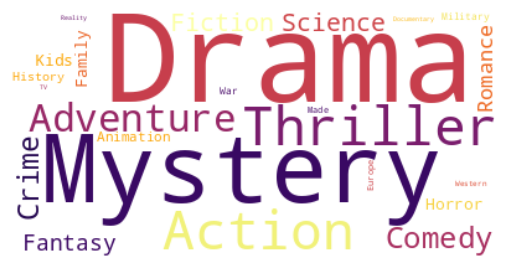

<Figure size 1500x2000 with 0 Axes>

In [ ]:
#Let's Visualize it using word cloud

#Importing Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data=pd.concat([movie_data,tvshow_data])

#Checking for NaN values
data['Genres'].isna().sum()

#Creating the text variable
text = " ".join(genre for genre in data.Genres)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(max_font_size=100, max_words=150, collocations = False, background_color = 'white',colormap='inferno').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[15,20])
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
data=pd.concat([movie_data,tvshow_data])

# Split streaming services into individual values and explode the DataFrame
data['Streaming_Service'] = data['Streaming_Service'].str.split(',')
services = data.explode('Streaming_Service')

# Count the occurrences of each streaming service
service_counts = services['Streaming_Service'].value_counts()

# Get the streaming service with the most significant number of offerings
top_streaming_service = service_counts.idxmax()
print("Streaming Service with Most Offerings:", top_streaming_service)

Streaming Service with Most Offerings: Netflix


In [ ]:
# Checking for NaN values
data=pd.concat([movie_data,tvshow_data])
print(data['Streaming_Service'].isna().sum())

37


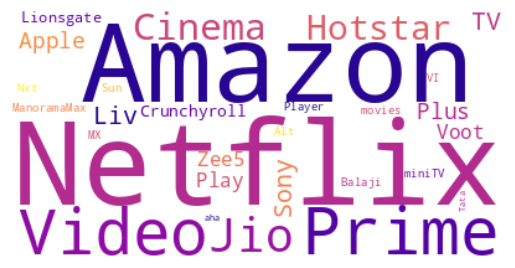

<Figure size 1500x2000 with 0 Axes>

In [ ]:
#Let's Visvalize it using word cloud
data=pd.concat([movie_data,tvshow_data])

# Remove NaN values from data
copy_data=data['Streaming_Service']
copy_data.dropna(inplace=True)
copy_data.isna().sum()

#Creating the text variable
text = " ".join(ss for ss in copy_data)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(max_font_size=100, max_words=100, collocations = False, background_color = 'white',colormap='plasma').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[15,20])
plt.show()

## **Task 3 :- Data Export**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.concat([movie_data,tvshow_data])

#saving final dataframe as Final Data in csv format
data.to_csv('/content/drive/My Drive/justwatch.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format

data_2years.to_csv('/content/drive/My Drive/justwatch_2_years_data.csv', index=False)
data_highrating.to_csv('/content/drive/My Drive/justwatch_high_rating.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# Just watch popular movies and tv shows

https://drive.google.com/file/d/1W9VUbPhEsfoe7kc5bmE8aMfO_JV4NjpC/view?usp=sharing

# Just watch Data of last two years

https://drive.google.com/file/d/1-3rd_j_eUMMziwI4hyoCRA46_mUkezGv/view?usp=sharing

# Just watch data with high IMDb rating

https://drive.google.com/file/d/1-1tXGdDz7GQXkRfVnVflUhBDYCO-YgUR/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***